In [7]:
import os
from PIL import Image

# Define the input directory
input_dir = 'D:/ML_LOCAL_WIN/archive'

# Function to check and resize images to 64x64
def check_and_resize_images(directory, target_size=(64, 64)):
    resized_count = 0  # Counter for resized images
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):  # Ensure it's a directory
            print(f"Processing folder: {category}")
            for file_name in os.listdir(category_path):
                if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                    img_path = os.path.join(category_path, file_name)
                    try:
                        with Image.open(img_path) as img:
                            if img.size != target_size:  # Check if the image size is not 64x64
                                print(f"Resizing image: {img_path} (Current size: {img.size})")
                                img = img.resize(target_size)  # Resize to 64x64
                                img.save(img_path)  # Save the resized image
                                resized_count += 1  # Increment the counter
                            else:
                                print(f"Image already 64x64: {img_path}")
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    print("--------------------------------------------------------")
    print(f"Total images resized to {target_size}: {resized_count}")
    print("--------------------------------------------------------")

# Run the function
check_and_resize_images(input_dir)

Processing folder: AbdomenCT
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000000.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000001.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000002.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000003.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000004.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000005.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000006.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000007.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000008.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000009.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000010.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000011.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000012.jpeg
Image already 64x64: D:/ML_LOCAL_WIN/archive\AbdomenCT\000013.jpeg
Image already 64x64: D:/ML_LOCAL_

In [ ]:
import os
from PIL import Image
import hashlib

# Define the input directory
input_dir = 'D:/ML_LOCAL_WIN/archive'

# Function to calculate the hash of an image
def calculate_image_hash(image_path):
    try:
        with Image.open(image_path) as img:
            # img = img.resize((128, 128)).convert('L')  # Resize and convert to grayscale
            img_hash = hashlib.md5(img.tobytes()).hexdigest()  # Generate hash
        return img_hash
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Initialize counters for duplicates found and removed
total_duplicates_found = 0
total_duplicates_removed = 0

# Loop through each folder (class name) in the input directory
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        print(f"Checking for duplicates in folder: {category}")
        hash_map = {}  # Dictionary to store hashes and file paths
        duplicates = []  # List to store duplicate file paths

        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                img_path = os.path.join(category_path, file_name)
                img_hash = calculate_image_hash(img_path)

                if img_hash:
                    if img_hash in hash_map:
                        duplicates.append(img_path)  # Mark this file as a duplicate
                    else:
                        hash_map[img_hash] = img_path

        # Count duplicates found
        category_duplicates_count = len(duplicates)
        total_duplicates_found += category_duplicates_count

        # Print duplicates count for the current category
        print(f"Total duplicates found in folder '{category}': {category_duplicates_count}")

        # Remove duplicates
        if duplicates:
            print(f"Removing duplicates in folder '{category}':")
            for dup in duplicates:
                try:
                    os.remove(dup)
                    total_duplicates_removed += 1  # Increment removed counter
                    print(f"Removed: {dup}")
                except Exception as e:
                    print(f"Error removing file {dup}: {e}")
        else:
            print(f"No duplicates found in folder '{category}'.")

# Print summary of duplicates found and removed
print("--------------------------------------------------------")
print(f"Total duplicates found: {total_duplicates_found}")
print(f"Total duplicates removed: {total_duplicates_removed}")
print("--------------------------------------------------------")

Checking for duplicates in folder: AbdomenCT
Total duplicates found in folder 'AbdomenCT': 346
Removing duplicates in folder 'AbdomenCT':
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001584.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001586.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001591.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001592.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001607.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001612.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001616.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001618.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001623.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001629.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001633.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001640.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001650.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001651.jpeg
Removed: D:/ML_LOCAL_WIN/archive\AbdomenCT\001653.jpeg
Removed: D:/ML_LOCAL_WIN/archive\Abdo

In [3]:
# import os
# from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# # Define the input directory
# input_dir = 'D:/ML_LOCAL_WIN/archive'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each folder (class name) in the input directory
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                img_path = os.path.join(category_path, file_name)
                try:
                    # Open and preprocess the image
                    img = Image.open(img_path)
                    # img = img.resize((128, 128))  # Resize to 128x128
                    img_array = np.array(img)
                    
                    # Append the image and its label
                    images.append(img_array)
                    labels.append(category)  # Use the folder name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print some information about the loaded data
print(f"Loaded {len(images)} images.")
print(f"Image shape: {images[0].shape} ")
print(f"Labels: {np.unique(labels)}")


Loaded 58514 images.
Image shape: (64, 64) 
Labels: ['AbdomenCT' 'BreastMRI' 'CXR' 'ChestCT' 'Hand' 'HeadCT']


In [4]:
unique= np.unique(images)
array_shape = images.shape
print(f"Array shape: {array_shape}")
array_info = images.dtype
print(f"Array data type: {array_info}")
print(f"Unique values in images: {unique}")

first_image = images[0]
print(f"first image: {images[0]}")

Array shape: (58514, 64, 64)
Array data type: uint8
Unique values in images: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 22

Label 'AbdomenCT' count: 9654
Label 'BreastMRI' count: 8954
Label 'CXR' count: 9999
Label 'ChestCT' count: 10000
Label 'Hand' count: 10000
Label 'HeadCT' count: 9907
classes_6: {np.str_('AbdomenCT'): np.int64(9654), np.str_('BreastMRI'): np.int64(8954), np.str_('CXR'): np.int64(9999), np.str_('ChestCT'): np.int64(10000), np.str_('Hand'): np.int64(10000), np.str_('HeadCT'): np.int64(9907)}


Text(0.5, 0, 'Class Labels')

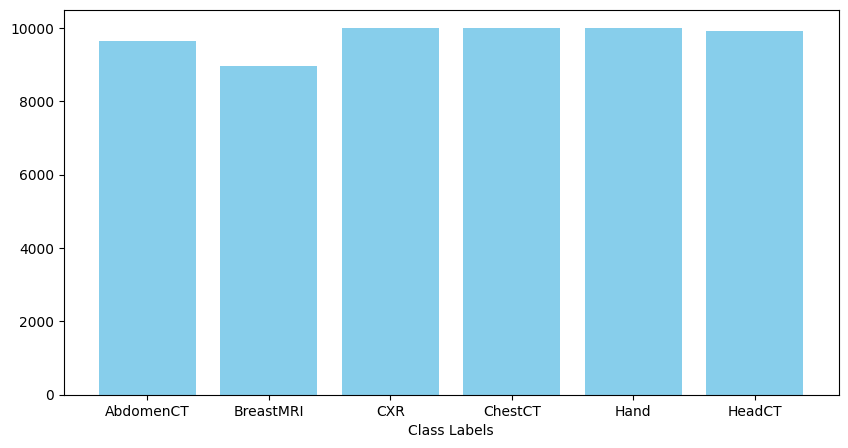

In [5]:
# i=0
classes_6={} #dictionary to store the count of each class
for unique_label in np.unique(labels):
    print(f"Label '{unique_label}' count: {np.sum(labels == unique_label)}")
    # i += 1
    classes_6[unique_label]=np.sum(labels == unique_label)

# print(f"Label '{unique_label}' {np.min(np.sum(labels == unique_label))}")
print (f"classes_6: {classes_6}")

# Plot the distribution of classes
plt.figure(figsize=(10, 5))
plt.bar(classes_6.keys(), classes_6.values(), color='skyblue')
plt.xlabel('Class Labels')